<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/principal_OMP_CoSaMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.linalg
import scipy.signal
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import OrthogonalMatchingPursuit

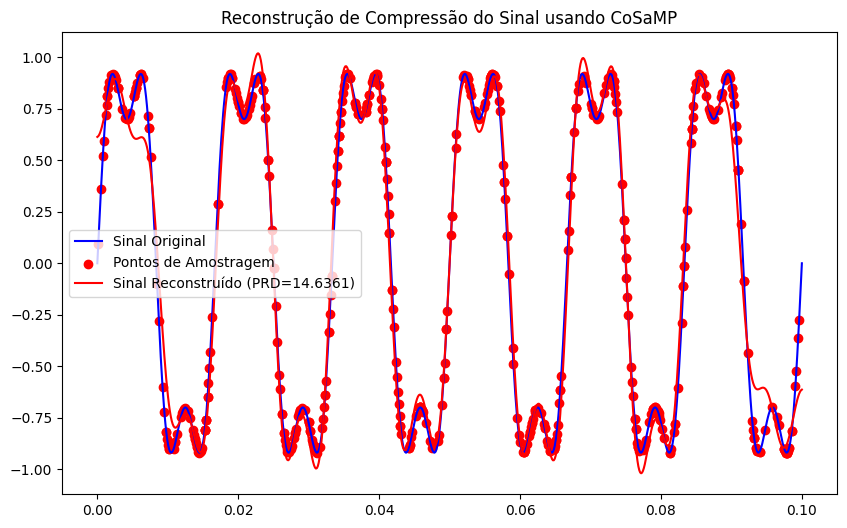

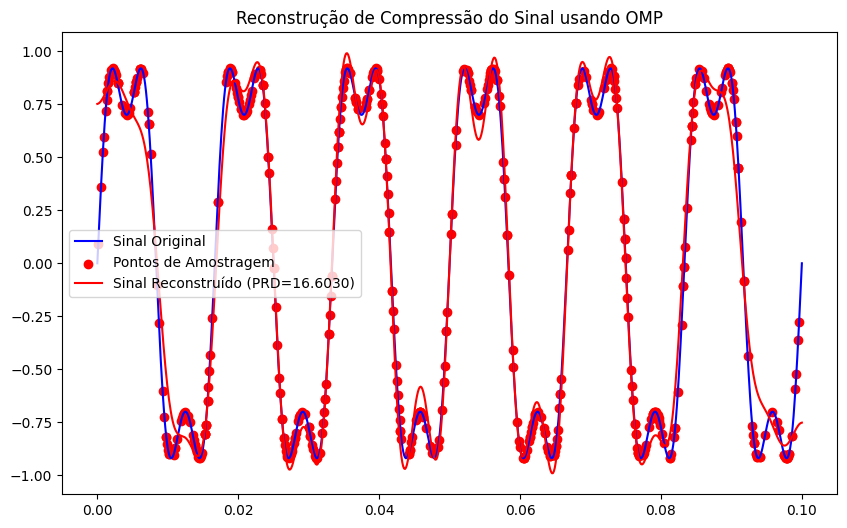

In [ ]:
#Algoritmo utilizando a Transformada de Cosseno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import scipy


def cosamp(Phi, u, s, tol=1e-10, max_iter=100):
    max_iter -= 1
    num_precision = 1e-12
    a = np.zeros(Phi.shape[1])
    v = u
    iter_count = 0
    halt = False
    while not halt:
        iter_count += 1
        y = np.abs(np.dot(np.transpose(Phi), v))
        Omega = [i for (i, val) in enumerate(y) if val > np.sort(y)[::-1][2 * s] and val > num_precision]
        T = np.union1d(Omega, a.nonzero()[0])
        b = np.dot(np.linalg.pinv(Phi[:, T]), u)
        igood = (np.abs(b) > np.sort(np.abs(b))[::-1][s]) & (np.abs(b) > num_precision)
        T = T[igood]
        a[T] = b[igood]
        v = u - np.dot(Phi[:, T], b[igood])
        halt = np.linalg.norm(v)/np.linalg.norm(u) < tol or iter_count > max_iter
    return a

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_mse(original, reconstructed):
    return 100 * np.sqrt(np.sum((original - reconstructed)**2) / np.sum((original)**2))


n = 6*128
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

x = np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t)
CR = 70
p = np.abs(np.round((n-n*CR)/100).astype(int))
amostras_aleatorias = np.round((n-1)*np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]

# Transformada discreta de cosseno
Phi = scipy.fftpack.dct(np.eye(n, n))
CPhi = Phi[amostras_aleatorias, :]

# algoritmo CoSaMP
s_reconstruido_cosamp = cosamp(CPhi, y, 10)
x_rec_cosamp = np.dot(Phi, s_reconstruido_cosamp)
mse_cosamp = calculate_mse(x, x_rec_cosamp)

# resultado do CoSaMP
plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b', label='Sinal Original')
plt.scatter(t[amostras_aleatorias], x[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec_cosamp, 'r', label=f'Sinal Reconstruído (PRD={mse_cosamp:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando CoSaMP')
plt.legend()
plt.show()


#o algoritmo OMP
s_reconstruido = omp(CPhi, y, 10)
x_rec = np.dot(Phi, s_reconstruido)
mse_omp = calculate_mse(x, x_rec)

# resultado do OMP
plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b', label='Sinal Original')
plt.scatter(t[amostras_aleatorias], x[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (PRD={mse_omp:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando OMP')
plt.legend()
plt.show()



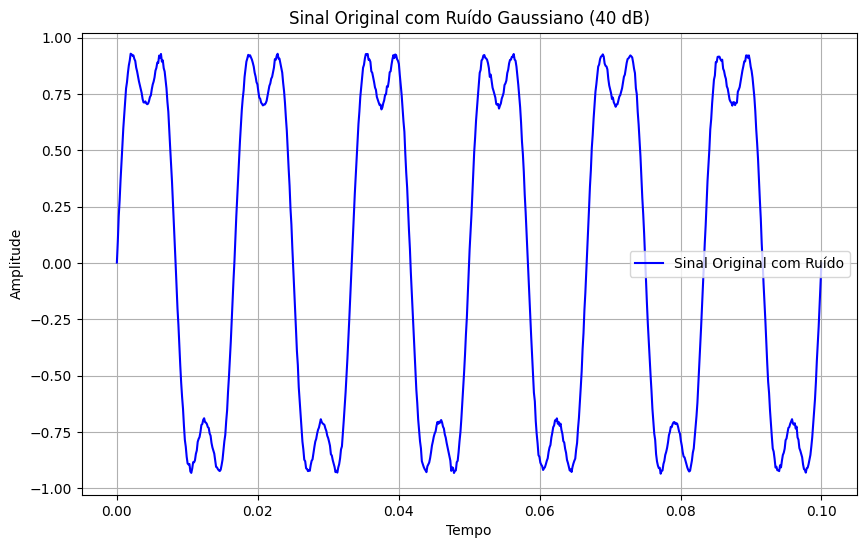

In [ ]:
#sinal original com o ruído branco ou gaussiano
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
n = 768
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

# Gerar sinal original
x = np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t)

#Adicionando o ruído gaussiano ao sinal original
media_ruido = 0
desvio_padrao_ruido = np.sqrt(np.var(x) / (10**(40/10)))  # Conversão de dB para magnitude do ruído
ruido_gaussiano = np.random.normal(media_ruido, desvio_padrao_ruido, len(x))
x_com_ruido = x + ruido_gaussiano

#O sinal original com ruído gaussiano
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.title('Sinal Original com Ruído Gaussiano (40 dB)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


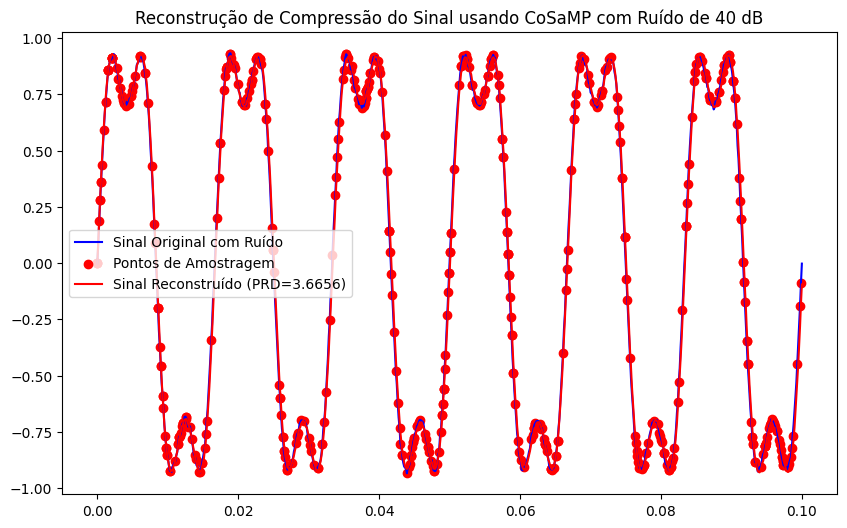

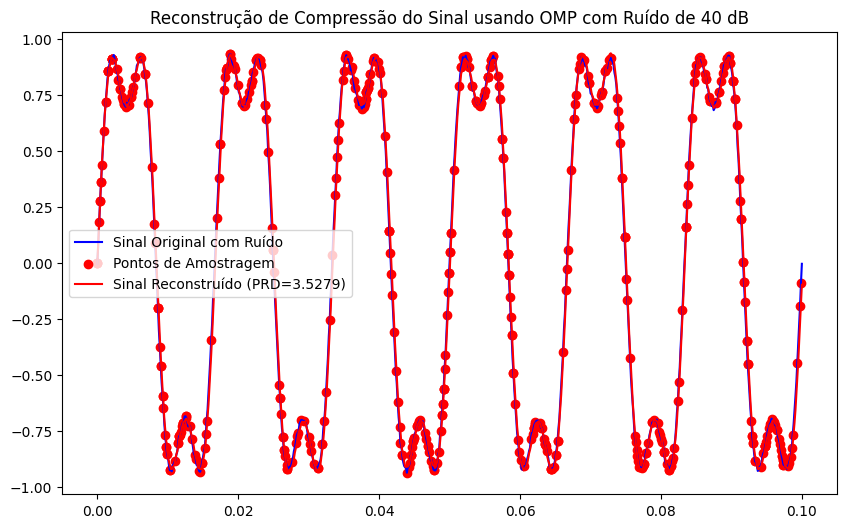

In [ ]:
#quando é adicionado o ruído gaussiano de 40 dB mesmo aumentando o erro aceitável e aumentando o número de iterações o CoSaMP não parece se sair bem.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import scipy


def cosamp(Phi, u, s, tol=1e-10, max_iter= 10):
    max_iter -= 1
    num_precision = 1e-12
    a = np.zeros(Phi.shape[1])
    v = u
    iter_count = 0
    halt = False
    while not halt:
        iter_count += 1
        y = np.abs(np.dot(np.transpose(Phi), v))
        Omega = [i for (i, val) in enumerate(y) if val > np.sort(y)[::-1][2 * s] and val > num_precision]
        T = np.union1d(Omega, a.nonzero()[0])
        b = np.dot(np.linalg.pinv(Phi[:, T]), u)
        igood = (np.abs(b) > np.sort(np.abs(b))[::-1][s]) & (np.abs(b) > num_precision)
        T = T[igood]
        a[T] = b[igood]
        v = u - np.dot(Phi[:, T], b[igood])
        halt = np.linalg.norm(v)/np.linalg.norm(u) < tol or iter_count > max_iter
    return a

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_mse(original, reconstructed):
    return 100 * np.sqrt(np.sum((original - reconstructed)**2) / np.sum((original)**2))


n = 6*128
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

x = np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)
# Adicionar ruído gaussiano ao sinal original
media_ruido = 0
desvio_padrao_ruido = np.sqrt(np.var(x) / (10 ** (40 / 10)))  # Conversão de dB para magnitude do ruído
ruido_gaussiano = np.random.normal(media_ruido, desvio_padrao_ruido, len(x))
x = x + ruido_gaussiano
CR = 70
p = np.abs(np.round((n - n * CR) / 100).astype(int))
amostras_aleatorias = np.round((n - 1) * np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]


Phi = np.fft.fft(np.eye(n, n))
CPhi = np.imag(Phi[amostras_aleatorias, :])

s_reconstruido_cosamp = cosamp(CPhi, y, 10)
x_rec_cosamp = np.imag(np.fft.fft(s_reconstruido_cosamp))

mse_cosamp = calculate_mse(x, x_rec_cosamp)



# Executar o algoritmo CoSaMP
#s_reconstruido_cosamp = cosamp(CPhi, y, 10)
#x_rec_cosamp = np.dot(Phi, s_reconstruido_cosamp)
#mse_cosamp = calculate_mse(x, x_rec_cosamp)

# Plotar resultado do CoSaMP
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.scatter(t[amostras_aleatorias], x_com_ruido[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec_cosamp, 'r', label=f'Sinal Reconstruído (PRD={mse_cosamp:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando CoSaMP com Ruído de 40 dB')
plt.legend()
plt.show()

# Executar o algoritmo OMP
s_reconstruido = omp(CPhi, y, 10)
x_rec = np.imag(np.fft.fft (s_reconstruido))
mse_omp = calculate_mse(x, x_rec)

# Plotar resultado do OMP
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.scatter(t[amostras_aleatorias], x_com_ruido[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (PRD={mse_omp:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando OMP com Ruído de 40 dB')
plt.legend()
plt.show()


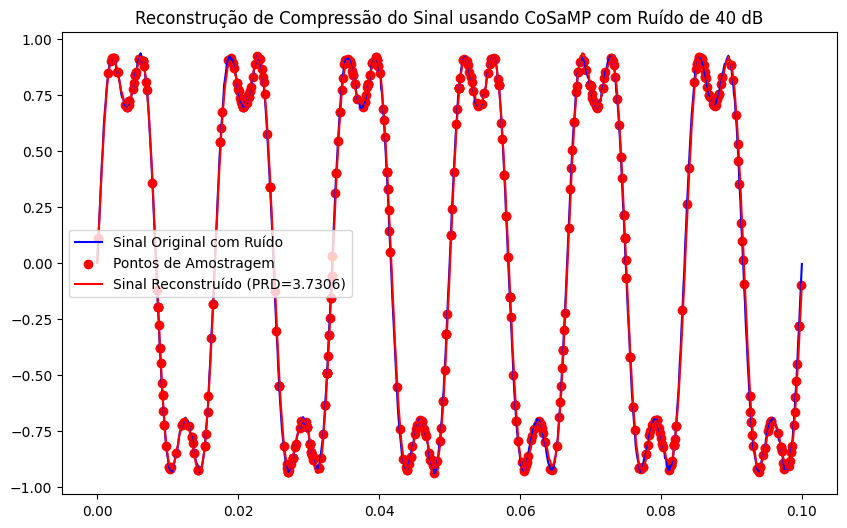

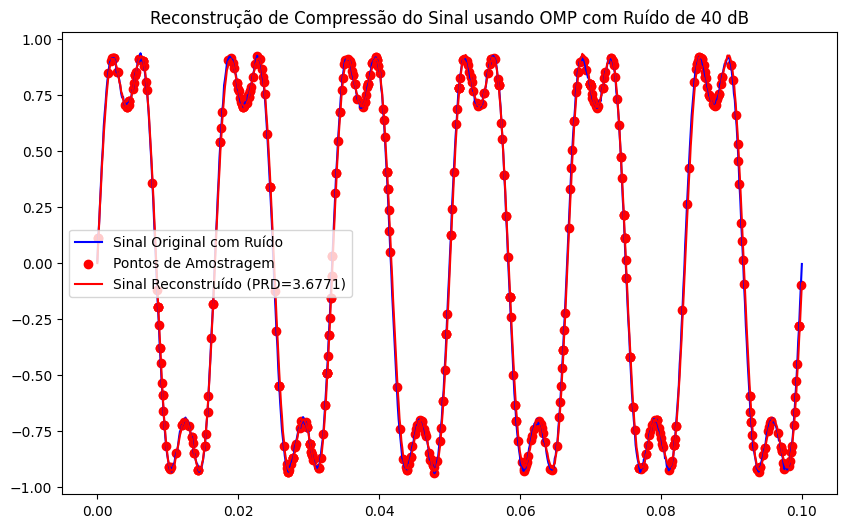

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit


def cosamp(Phi, u, s, tol=1e-10, max_iter=10):
    max_iter -= 1
    num_precision = 1e-12
    a = np.zeros(Phi.shape[1])
    v = u
    iter_count = 0
    halt = False
    while not halt:
        iter_count += 1
        y = np.abs(np.dot(np.transpose(Phi), v))
        Omega = [i for (i, val) in enumerate(y) if val > np.sort(y)[::-1][2 * s] and val > num_precision]
        T = np.union1d(Omega, a.nonzero()[0])
        b = np.dot(np.linalg.pinv(Phi[:, T]), u)
        igood = (np.abs(b) > np.sort(np.abs(b))[::-1][s]) & (np.abs(b) > num_precision)
        T = T[igood]
        a[T] = b[igood]
        v = u - np.dot(Phi[:, T], b[igood])
        halt = np.linalg.norm(v) / np.linalg.norm(u) < tol or iter_count > max_iter
    return a


def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_


def calculate_mse(original, reconstructed):
    return 100 * np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum((original) ** 2))


n = 6 * 128
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

x = np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)

# Adicionar ruído gaussiano ao sinal original
media_ruido = 0
desvio_padrao_ruido = np.sqrt(np.var(x) / (10 ** (40 / 10)))  # Conversão de dB para magnitude do ruído
ruido_gaussiano = np.random.normal(media_ruido, desvio_padrao_ruido, len(x))
x_com_ruido = x + ruido_gaussiano

CR = 70
p = np.abs(np.round((n - n * CR) / 100).astype(int))
amostras_aleatorias = np.round((n - 1) * np.random.rand(p)).astype(int)
y = x_com_ruido[amostras_aleatorias]

Phi = np.fft.fft(np.eye(n, n))
CPhi = np.imag(Phi[amostras_aleatorias, :])

# Executar o algoritmo CoSaMP
s_reconstruido_cosamp = cosamp(CPhi, y, 10)
x_rec_cosamp = np.imag(np.fft.fft (s_reconstruido_cosamp))

# Calcular erro de reconstrução
mse_cosamp = calculate_mse(x_com_ruido, x_rec_cosamp)

# Plotar resultado do CoSaMP
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.scatter(t[amostras_aleatorias], x_com_ruido[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec_cosamp, 'r', label=f'Sinal Reconstruído (PRD={mse_cosamp:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando CoSaMP com Ruído de 40 dB')
plt.legend()
plt.show()

# Executar o algoritmo OMP
s_reconstruido_omp = omp(CPhi, y, 10)
x_rec_omp = np.imag(np.fft.fft( s_reconstruido_omp))

# Calcular erro de reconstrução
mse_omp = calculate_mse(x_com_ruido, x_rec_omp)

# Plotar resultado do OMP
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.scatter(t[amostras_aleatorias], x_com_ruido[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec_omp, 'r', label=f'Sinal Reconstruído (PRD={mse_omp:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando OMP com Ruído de 40 dB')
plt.legend()
plt.show()


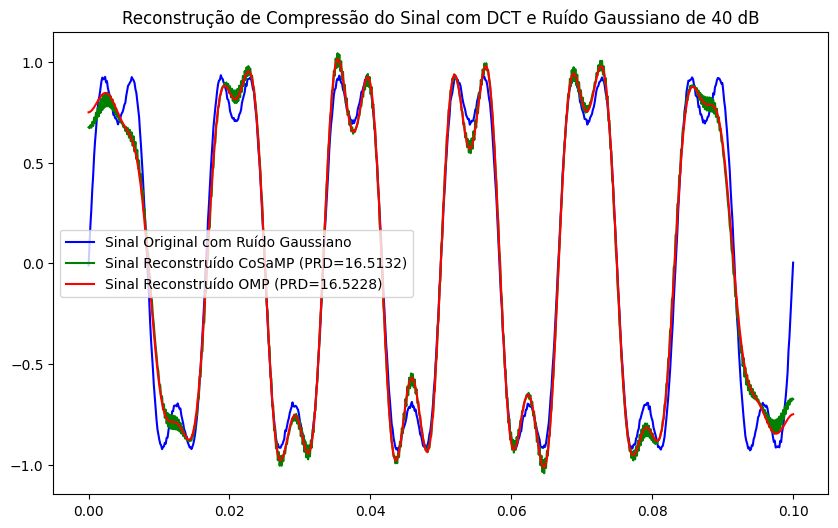

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import scipy.fftpack

def cosamp(Phi, u, s, tol=1e-10, max_iter=100):
    max_iter -= 1
    num_precision = 1e-12
    a = np.zeros(Phi.shape[1])
    v = u
    iter_count = 0
    halt = False
    while not halt:
        iter_count += 1
        y = np.abs(np.dot(np.transpose(Phi), v))
        Omega = [i for (i, val) in enumerate(y) if val > np.sort(y)[::-1][2 * s] and val > num_precision]
        T = np.union1d(Omega, a.nonzero()[0])
        b = np.dot(np.linalg.pinv(Phi[:, T]), u)
        igood = (np.abs(b) > np.sort(np.abs(b))[::-1][s]) & (np.abs(b) > num_precision)
        T = T[igood]
        a[T] = b[igood]
        v = u - np.dot(Phi[:, T], b[igood])
        halt = np.linalg.norm(v) / np.linalg.norm(u) < tol or iter_count > max_iter
    return a

def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_mse(original, reconstructed):
    return 100 * np.sqrt(np.sum((original - reconstructed)**2) / np.sum((original)**2))

# Parâmetros do sinal
n = 768
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

# Sinal original
x = np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t)

# Ruído gaussiano
media_ruido = 0
desvio_padrao_ruido = np.sqrt(np.var(x) / (10**(40/10)))  # Conversão de dB para magnitude do ruído
ruido_gaussiano = np.random.normal(media_ruido, desvio_padrao_ruido, len(x))
x_com_ruido = x + ruido_gaussiano

# Compressão do sinal com DCT
CR = 70
p = np.abs(np.round((n-n*CR)/100).astype(int))
amostras_aleatorias = np.round((n-1)*np.random.rand(p)).astype(int)
y = x_com_ruido[amostras_aleatorias]

Phi = scipy.fftpack.dct(np.eye(n, n))
CPhi = scipy.fftpack.dct(np.eye(n, n))[amostras_aleatorias, :]

# Reconstrução usando CoSaMP
s_reconstruido_cosamp = cosamp(CPhi, y, 10)
x_rec_cosamp = np.dot(Phi, s_reconstruido_cosamp)
mse_cosamp = calculate_mse(x, x_rec_cosamp)

# Reconstrução usando OMP
s_reconstruido = omp(CPhi, y, 10)
x_rec = np.dot(Phi, s_reconstruido)
mse_omp = calculate_mse(x, x_rec)

# Plotar resultados
plt.figure(figsize=(10, 6))

# Sinal original com ruído gaussiano
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído Gaussiano')

# Reconstrução CoSaMP
plt.plot(t, x_rec_cosamp, 'g', label=f'Sinal Reconstruído CoSaMP (PRD={mse_cosamp:.4f})')

# Reconstrução OMP
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído OMP (PRD={mse_omp:.4f})')

plt.title('Reconstrução de Compressão do Sinal com DCT e Ruído Gaussiano de 40 dB')
plt.legend()
plt.show()


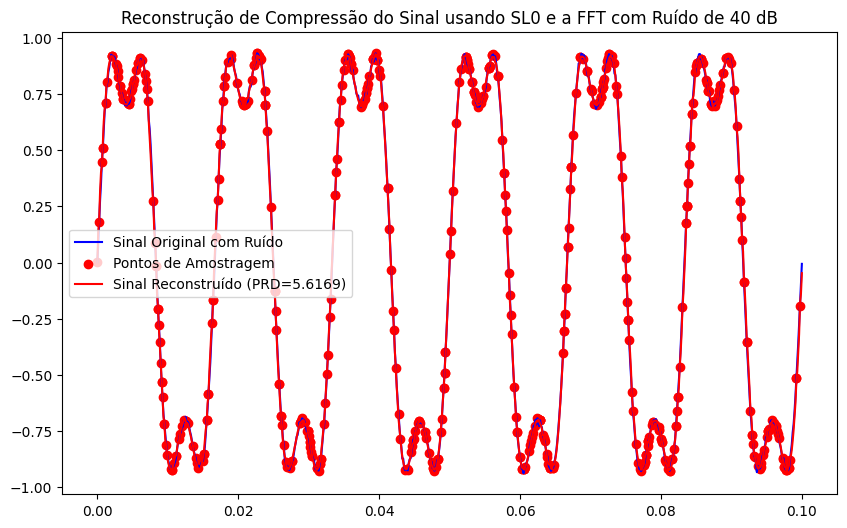

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

def sl0(A, x, sigma_min, sigma_decrease_factor=0.5, mu_0=2, L=3, A_pinv=None, true_s=None):
    if A_pinv is None:
        A_pinv = np.linalg.pinv(A)

    s = np.dot(A_pinv, x)
    sigma = 2.0 * np.abs(s).max()

    while sigma > sigma_min:
        for i in range(L):
            delta = delta_fn(s, sigma)
            s = s - mu_0 * delta
            s = s - np.dot(A_pinv, (np.dot(A, s) - x))

        sigma *= sigma_decrease_factor

    return s

def delta_fn(s, sigma):
    return s * np.exp(-np.abs(s)**2 / sigma**2)

def estimate_snr(estim_s, true_s):
    err = true_s - estim_s
    return 10 * np.log10(np.sum(np.abs(true_s)**2) / np.sum(np.abs(err)**2))


n = 6 * 128
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

x = np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)
# Adicionar ruído gaussiano ao sinal original
media_ruido = 0
desvio_padrao_ruido = np.sqrt(np.var(x) / (10 ** (40 / 10)))  # Conversão de dB para magnitude do ruído
ruido_gaussiano = np.random.normal(media_ruido, desvio_padrao_ruido, len(x))
x = x + ruido_gaussiano
CR = 70
p = np.abs(np.round((n - n * CR) / 100).astype(int))
amostras_aleatorias = np.round((n - 1) * np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]



Phi = np.fft.fft(np.eye(n, n))
CPhi = (Phi[amostras_aleatorias, :])

# Executar o algoritmo SL0
x_hat = sl0(CPhi, y, sigma_min=1e-2)
s_reconstruido_sl0 = np.real(np.fft.fft(x_hat))
#np.real(np.fft.fft((sl0(CPhi, y, 10))))
#x_rec_sl0 = np.dot(Phi, s_reconstruido_sl0)

# Calcular o erro de reconstrução
mse_sl0 = 100 * np.sqrt(np.sum((x - x_rec_sl0) ** 2) / np.sum((x) ** 2))

# Plotar o resultado do SL0
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.scatter(t[amostras_aleatorias], x_com_ruido[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, s_reconstruido_sl0, 'r', label=f'Sinal Reconstruído (PRD={mse_sl0:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando SL0 e a FFT com Ruído de 40 dB')
plt.legend()
plt.show()


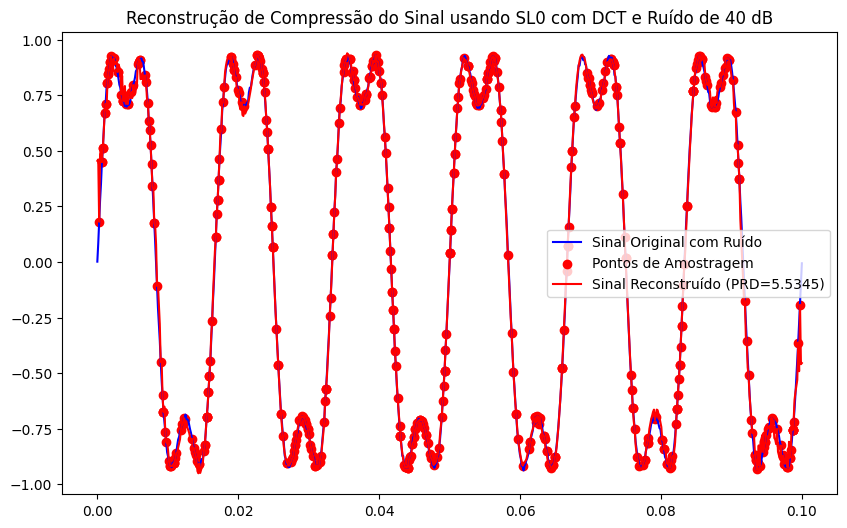

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from sklearn.linear_model import OrthogonalMatchingPursuit


def sl0(A, x, sigma_min, sigma_decrease_factor=0.5, mu_0=2, L=3, A_pinv=None):
    if A_pinv is None:
        A_pinv = np.linalg.pinv(A)

    s = np.dot(A_pinv, x)
    sigma = 2.0 * np.abs(s).max()

    while sigma > sigma_min:
        for i in range(L):
            delta = delta_fn(s, sigma)
            s = s - mu_0 * delta
            s = s - np.dot(A_pinv, (np.dot(A, s) - x))

        sigma *= sigma_decrease_factor

    return s

def delta_fn(s, sigma):
    return s * np.exp(-np.abs(s)**2 / sigma**2)

def calculate_mse(original, reconstructed):
    return 100 * np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum((original) ** 2))


n = 6 * 128
t = np.linspace(0.0, 0.1, num=n)
f1 = 60
f2 = 180

x = np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)

# Adicionar ruído gaussiano ao sinal original
media_ruido = 0
desvio_padrao_ruido = np.sqrt(np.var(x) / (10 ** (40 / 10)))  # Conversão de dB para magnitude do ruído
ruido_gaussiano = np.random.normal(media_ruido, desvio_padrao_ruido, len(x))
x_com_ruido = x + ruido_gaussiano

CR = 70
p = np.abs(np.round((n - n * CR) / 100).astype(int))
amostras_aleatorias = np.round((n - 1) * np.random.rand(p)).astype(int)
y = x_com_ruido[amostras_aleatorias]

# Transformada discreta de cosseno
Phi = dct(np.eye(n, n))
CPhi = Phi[amostras_aleatorias, :]

# Executar o algoritmo SL0
s_reconstruido_sl0 = sl0(CPhi, y, sigma_min=1e-2)
x_rec_sl0 = np.dot(Phi, s_reconstruido_sl0)

# Calcular erro de reconstrução
mse_sl0 = calculate_mse(x_com_ruido, x_rec_sl0)

# Plotar resultado do SL0
plt.figure(figsize=(10, 6))
plt.plot(t, x_com_ruido, 'b', label='Sinal Original com Ruído')
plt.scatter(t[amostras_aleatorias], x_com_ruido[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec_sl0, 'r', label=f'Sinal Reconstruído (PRD={mse_sl0:.4f})')
plt.title('Reconstrução de Compressão do Sinal usando SL0 com DCT e Ruído de 40 dB')
plt.legend()
plt.show()
